* Problem statement

BigMart sales prediction :A regression problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

* Hypothesis Generation

based on store size :stores that are big in size may have a huge number of sales because it will have alot of products according to its size 
based on product visibility :product that was visible to people in front of them will be bought before the product behind them 

CSV containing the item outlet information with a sales value

Variable Description

Item_Identifier ---- Unique product ID

Item_Weight ---- Weight of product

Item_Fat_Content ---- Whether the product is low fat or not

Item_Visibility ---- The % of the total display area of all products in a store allocated to the particular product

Item_Type ---- The category to which the product belongs

Item_MRP ---- Maximum Retail Price (list price) of the product

Outlet_Identifier ---- Unique store ID

Outlet_Establishment_Year ---- The year in which the store was established

Outlet_Size ---- The size of the store in terms of ground area covered

Outlet_Location_Type ---- The type of city in which the store is located

Outlet_Type ---- Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales ---- sales of the product in t particular store. This is the outcome variable to be predicted.

# Loading Packages and Data

In [144]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,PolynomialFeatures,RobustScaler, OneHotEncoder, PowerTransformer,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
warnings.simplefilter(action="ignore", category=FutureWarning)

In [145]:
df=pd.read_csv("Train.csv")

* Data structure and content

In [146]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [147]:
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [148]:
df.shape

(8523, 12)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [150]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Exploratery Data Analysis

* Drop Item_Identifier column (Item ID)

In [151]:
df.drop(columns="Item_Identifier",inplace=True )

In [152]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [153]:
df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Note: there are missing values in Item_Weight which is numerical column,and Outlet_Size column which is categorical column

* check for duplication

In [154]:
df.duplicated().sum()

0

Note : There is no duplication in the dataset 

* Univariate Analysis

Numerical columns

In [155]:
numerical_cols=df.select_dtypes(include="number").columns
numerical_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

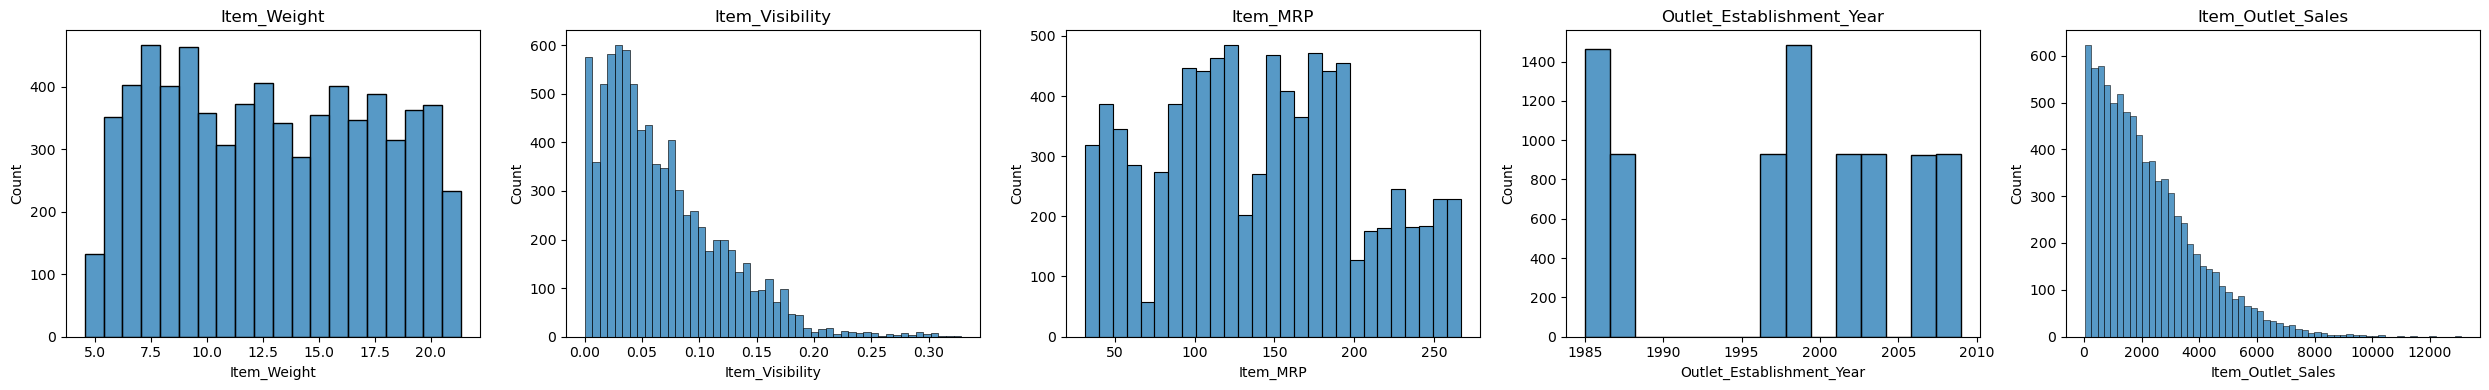

In [156]:
# Create subplots for each variable
num_vars = len(numerical_cols)
fig, axes = plt.subplots(1, num_vars, figsize=(5 * num_vars, 4))

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df[col], ax=axes[i])
    axes[i].set_title(col)
    
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [157]:
df["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Notes:

-There is right skewness in Item_Visibility and Item_Outlet_Sales

-Item weight is between 5 to 20 

-There were not outlet stablished in the period between 1990 to 1995

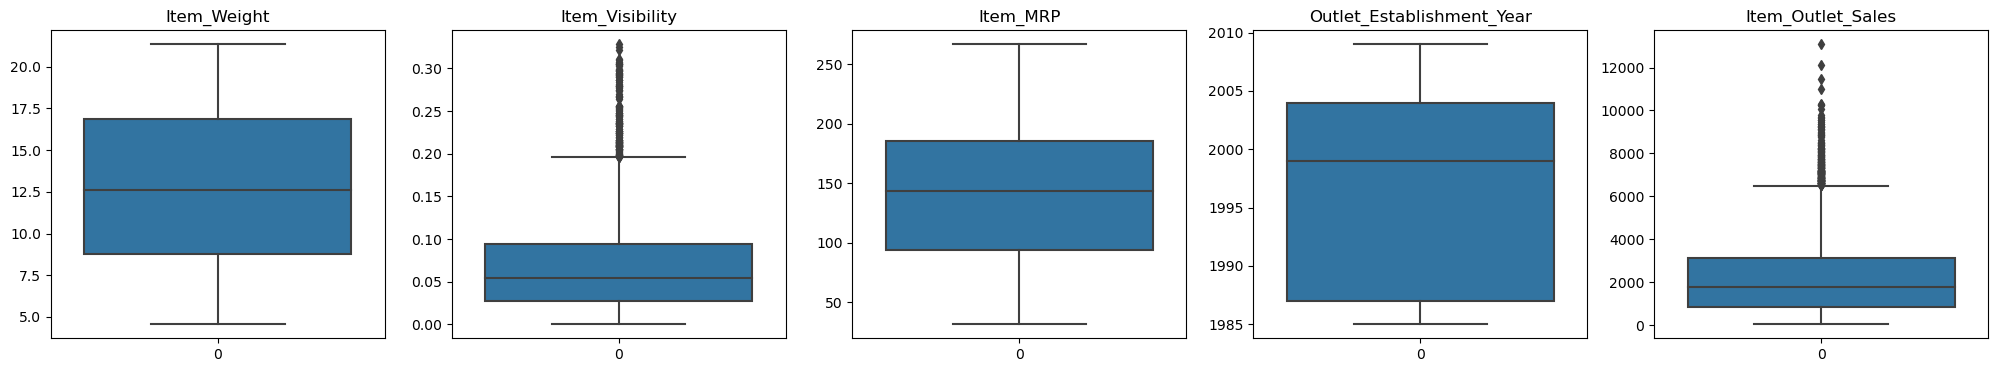

In [158]:

fig, axes = plt.subplots(1, num_vars, figsize=(5 * num_vars, 4))

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.show()

There are outliers in item_Outlet_Sales and Item_Outlet_Sales

Categorical columns

In [159]:
cat_cols=df.select_dtypes(exclude="number").columns
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

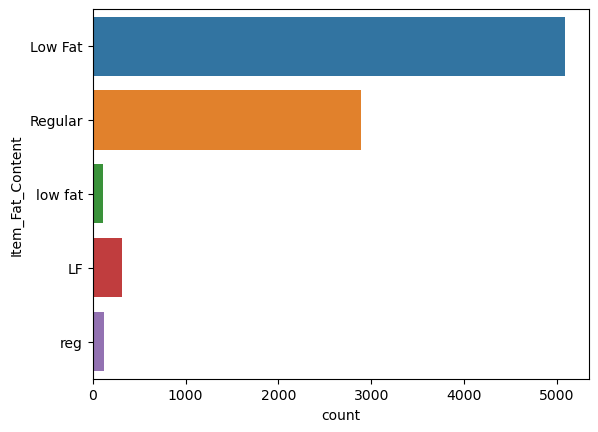

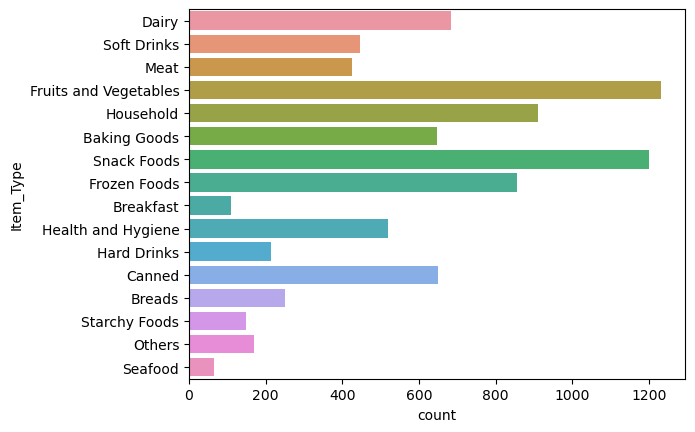

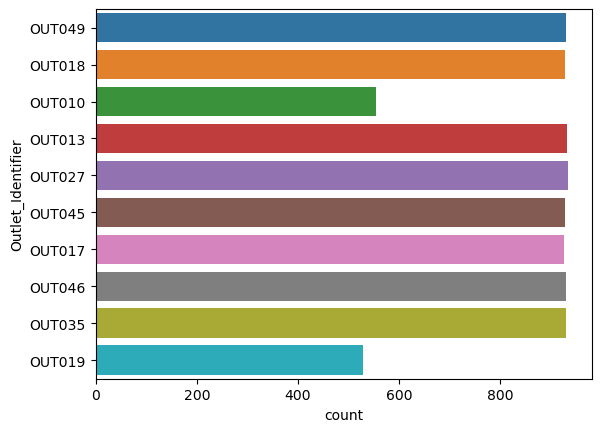

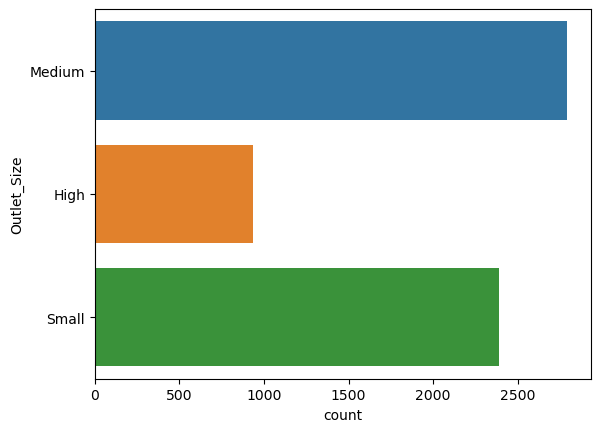

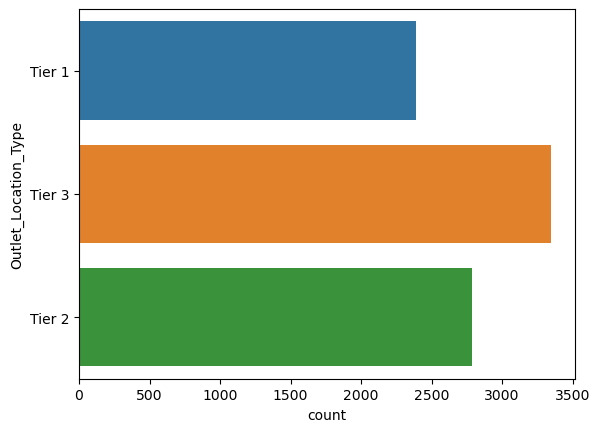

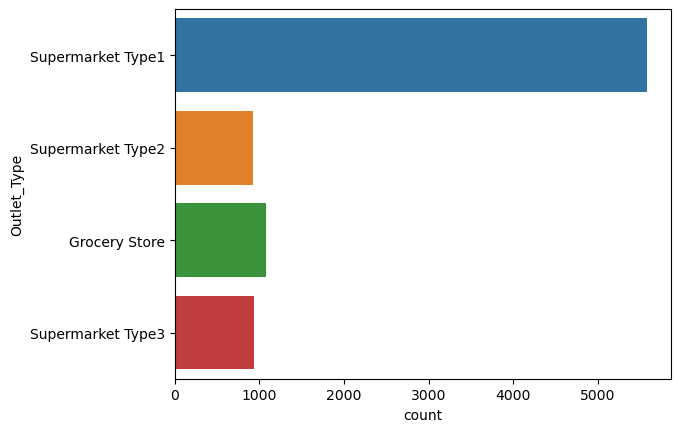

<Figure size 640x480 with 0 Axes>

In [160]:
for col in cat_cols:
    sns.countplot(y=col,data=df,orient="h")
    plt.figure()

Note:From Item_Fat_Content columns LF, LOW FAT, low fat are the same so let us replace LF,low fat to Low Fat and replace reg to Regular

In [161]:
df["Item_Fat_Content"].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"},inplace=True)


<AxesSubplot:xlabel='count', ylabel='Item_Fat_Content'>

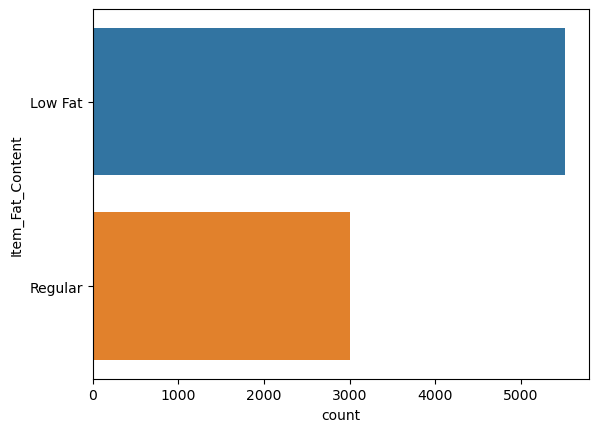

In [162]:
sns.countplot(y="Item_Fat_Content",data=df)

# Bivariate Analysis

Numerical-Numerical

 Correlation between variables

In [163]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:title={'center':'Correlation between the variables'}>

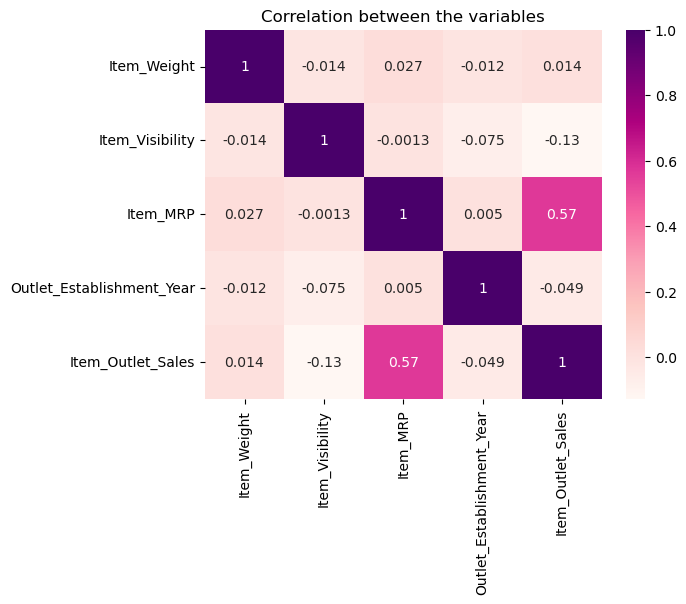

In [164]:

plt.title('Correlation between the variables')
sns.heatmap(df.select_dtypes("number").corr(), annot=True,cmap='RdPu')

In [165]:
y=df["Item_Outlet_Sales"]
X=df.drop(columns="Item_Outlet_Sales")

In [166]:
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

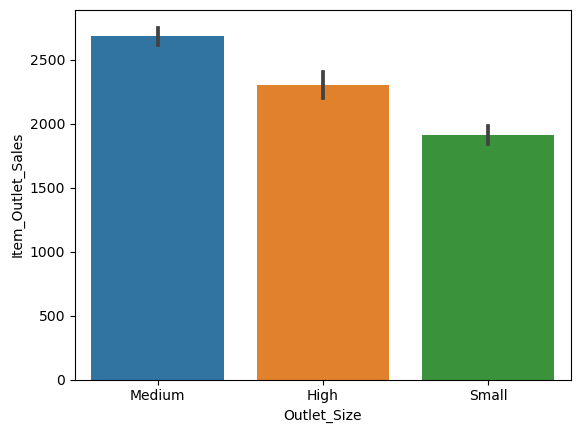

In [167]:
sns.barplot(x="Outlet_Size",data=df,y=y);

Note: Outlet sales are high  if the Outlet size is medium

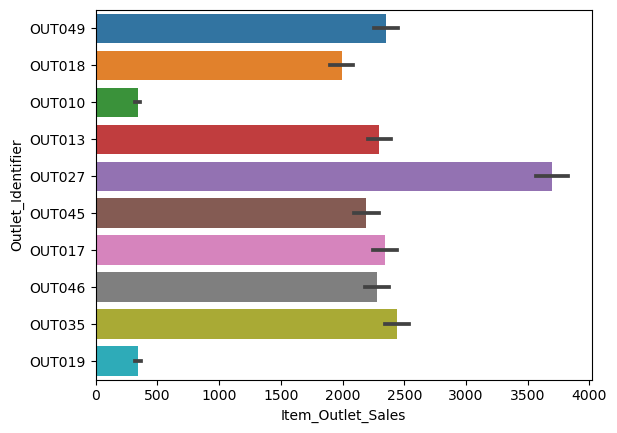

In [168]:
sns.barplot(y="Outlet_Identifier",data=df,x=y);

Outlet sales is very high in outlet_identifier OUT027

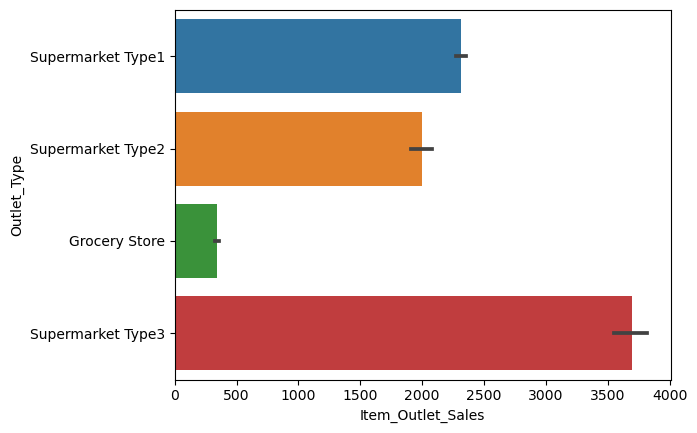

In [169]:
sns.barplot(y="Outlet_Type",data=df,x=y);

Outlet sales is very high in Supermarket type 3

let us split data to train ,val

In [170]:
X_train, X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=42)

In [171]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 549 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5644 non-null   float64
 1   Item_Fat_Content           6818 non-null   object 
 2   Item_Visibility            6818 non-null   float64
 3   Item_Type                  6818 non-null   object 
 4   Item_MRP                   6818 non-null   float64
 5   Outlet_Identifier          6818 non-null   object 
 6   Outlet_Establishment_Year  6818 non-null   int64  
 7   Outlet_Size                4883 non-null   object 
 8   Outlet_Location_Type       6818 non-null   object 
 9   Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 585.9+ KB


# Handling missing values

In [172]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,9.500,Regular,0.035206,Fruits and Vegetables,171.3448,OUT049,1999,Medium,Tier 1,Supermarket Type1
7757,18.000,Low Fat,0.047473,Household,170.5422,OUT045,2002,NaN,Tier 2,Supermarket Type1
764,17.600,Regular,0.076122,Meat,111.7202,OUT046,1997,Small,Tier 1,Supermarket Type1
6867,8.325,Low Fat,0.029845,Fruits and Vegetables,41.6138,OUT045,2002,NaN,Tier 2,Supermarket Type1
2716,12.850,Low Fat,0.137228,Snack Foods,155.5630,OUT046,1997,Small,Tier 1,Supermarket Type1


In [173]:
numerical_cols=X_train.select_dtypes(include="number").columns

In [174]:
num_pipeline = Pipeline([
        ('num_imputer', SimpleImputer(strategy="mean")),
        
        
        ('std_scaler', StandardScaler()),
    ])

#####################################################

cat_pipeline = Pipeline([
        ('cat_imputer', SimpleImputer(strategy="most_frequent")),
        ('encoding',OrdinalEncoder()),
    ])

#########################################################
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_cols),
        ("cat", cat_pipeline, cat_cols),
    ])

In [175]:
X_train = full_pipeline.fit_transform(X_train)
X_val= full_pipeline.transform(X_val)

# Modeling

Helper function

In [176]:
def evaluate(model_,name="model"):
    preds=model_.predict(X_val)
    mse = mean_squared_error(y_val , preds)
    rmse =  mean_squared_error(y_val , preds,squared=False)
    r2 = r2_score(y_val , preds)

    print('{} RMSE    : {}'.format(name,rmse))
    print('{}  MSE     :  {}'.format(name,mse))
    print('{}  R2 Score   :  {}'.format(name,r2))

* Linear Regression

In [177]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [178]:
print('Training score  : {}'.format(lin_reg_model.score(X_train, y_train)))
print('Val score      : {}'.format(lin_reg_model.score(X_val, y_val)))

Training score  : 0.5065325092431858
Val score      : 0.5247446245148588


In [179]:
evaluate(lin_reg_model,"linear regression model")

linear regression model RMSE    : 1136.542953243433
linear regression model  MSE     :  1291729.8845673043
linear regression model  R2 Score   :  0.5247446245148588


* Regularized Linear Regression

In [180]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [181]:
print('Training score  : {}'.format(lasso_model.score(X_train, y_train)))
print('Val score      : {}'.format(lasso_model.score(X_val, y_val)))

Training score  : 0.5065210723141509
Val score      : 0.5248522708145316


In [182]:
evaluate(lasso_model,"lasso model")

lasso model RMSE    : 1136.4142313201696
lasso model  MSE     :  1291437.305147012
lasso model  R2 Score   :  0.5248522708145316


In [183]:
from sklearn.model_selection import GridSearchCV


In [184]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [185]:
print('Training R2 score  : {}'.format(ridge_model.score(X_train, y_train)))
print('Val R2  score      : {}'.format(ridge_model.score(X_val, y_val)))

Training R2 score  : 0.5065324573238599
Val R2  score      : 0.5247408525310948


In [186]:
evaluate(ridge_model,"ridge model")

ridge model RMSE    : 1136.5474634639181
ridge model  MSE     :  1291740.1367062666
ridge model  R2 Score   :  0.5247408525310948


*  Random Forest

In [187]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [188]:
print('Training score  : {}'.format(rf_model.score(X_train, y_train)))
print('Val score      : {}'.format(rf_model.score(X_val, y_val)))

Training score  : 0.9379120082328619
Val score      : 0.5661638713538312


In [189]:
evaluate(rf_model,"Random forest model")

Random forest model RMSE    : 1085.8883973397858
Random forest model  MSE     :  1179153.6114771683
Random forest model  R2 Score   :  0.5661638713538312


* XGBoosT

In [190]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [191]:
print('Training score  : {}'.format(xgb_model.score(X_train, y_train)))
print('Val score      : {}'.format(xgb_model.score(X_val, y_val)))

Training score  : 0.8579272100824586
Val score      : 0.5458120705870868


In [192]:
evaluate(xgb_model,"xgboost model")

xgboost model RMSE    : 1111.0666932110453
xgboost model  MSE     :  1234469.1967629269
xgboost model  R2 Score   :  0.5458120705870868


In [193]:
train_=[]
val_=[]
for n in range(1,10):

    model = XGBRegressor(max_depth=n)
    model.fit(X_train, y_train)
    y_val_pred=model.predict(X_val)
    train_.append(model.score(X_train, y_train))
    val_.append(model.score(X_val,y_val))

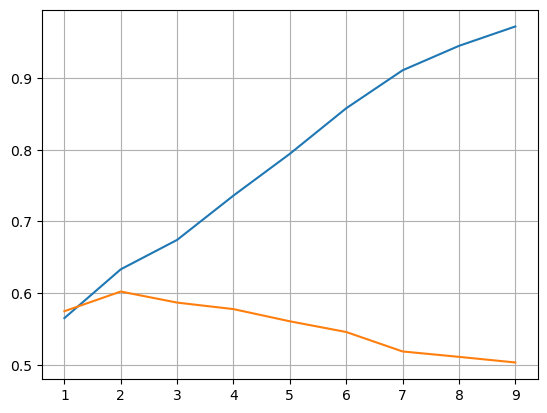

In [194]:
plt.plot( range(1,10) , train_)
plt.plot( range(1,10), val_)
plt.grid()
plt.show()

Note: The best value for max_depth =2 , so retrain the model with max_depth=2

In [195]:
xgb_model = XGBRegressor(max_depth=2)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [196]:
print('Training score  : {}'.format(xgb_model.score(X_train, y_train)))
print('Val score      : {}'.format(xgb_model.score(X_val, y_val)))

Training score  : 0.6332599724938869
Val score      : 0.602266178595651


In [197]:
evaluate(xgb_model,"xgboost model")

xgboost model RMSE    : 1039.725262296777
xgboost model  MSE     :  1081028.6210581018
xgboost model  R2 Score   :  0.602266178595651


# Save the model

In [198]:
# save the trained model as a pickle string
saved_xgb_model=pickle.dumps(xgb_model)

#load the pickled model
xgb_from_pickle=pickle.loads(saved_xgb_model)


Test Data


In [199]:
df_test=pd.read_csv("Test.csv")

In [200]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [201]:
df_test["Item_Fat_Content"].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"},inplace=True)
df_test=full_pipeline.transform(df_test)

In [202]:
# Use the loaded pickled model to make predictions
preds=xgb_from_pickle.predict(df_test)

In [203]:
preds.shape

(5681,)